# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 

# Load the data

In [2]:
data=pd.read_csv(r"E:\Transformed Data Set - Sheet1.csv")
data.dtypes

Favorite Color          object
Favorite Music Genre    object
Favorite Beverage       object
Favorite Soft Drink     object
Gender                  object
dtype: object

In [3]:
data.tail()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M
65,Cool,Electronic,Beer,Coca Cola/Pepsi,M


# Data description


In [4]:
print("Total number of samples: {}".format(data.shape[0]))
print("total number of male:{} ".format(data[data.Gender=='M'].shape[0]) )
print("total number of female:{} ".format(data[data.Gender=='F'].shape[0]) )

Total number of samples: 66
total number of male:33 
total number of female:33 


In [5]:
d=data["Favorite Color"].value_counts()
color=d.index
color
#data.isnull().sum()

Index(['Cool', 'Warm', 'Neutral'], dtype='object')

In [6]:
c=data["Favorite Music Genre"].value_counts()
gener=c.index
gener

Index(['Rock', 'Pop', 'Hip hop', 'Electronic', 'R&B and soul',
       'Folk/Traditional', 'Jazz/Blues'],
      dtype='object')

In [7]:
b = data['Favorite Beverage'].value_counts()
beverage = b.index
b

Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: Favorite Beverage, dtype: int64

In [8]:
s = data['Favorite Soft Drink'].value_counts()
soft = s.index
s

Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: Favorite Soft Drink, dtype: int64

In [9]:
data.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

# Prepare the data

In [10]:
x,y=data.iloc[:,:-1].values,data.iloc[:,-1]
#sns.pairplot(data['Favorite Color', 'Favorite Music Genre', 'Favorite Music Genre'], hue='Gender', size=2)

In [11]:
from sklearn.preprocessing import LabelEncoder
data1=data.copy(deep=True)
gender_encoder = LabelEncoder()
data1["Favorite Color"]=gender_encoder.fit_transform(data['Favorite Color'])
music=LabelEncoder()
data1['Favorite Music Genre']=music.fit_transform(data['Favorite Music Genre'])
beverage=LabelEncoder()
data1['Favorite Beverage']=beverage.fit_transform(data['Favorite Beverage'])
soft=LabelEncoder()
data1["Favorite Soft Drink"]=soft.fit_transform(data["Favorite Soft Drink"])
gender=LabelEncoder()
data1['Gender']=gender.fit_transform(data['Gender'])
data1




,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
5,2,3,1,2,0
6,0,4,0,1,0
7,2,4,4,2,0
8,2,6,2,0,0
9,1,4,5,1,0


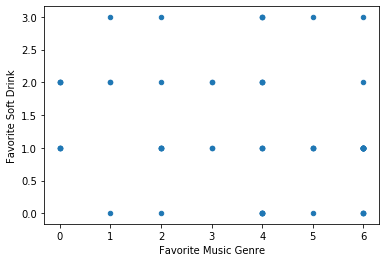

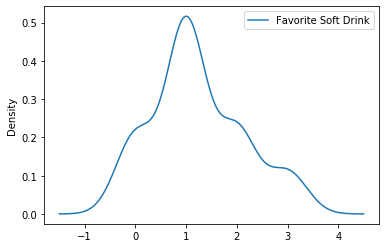

In [12]:
data1.plot(kind='scatter', x='Favorite Music Genre', y='Favorite Soft Drink')
data1.plot(kind='kde', y='Favorite Soft Drink')
#seaborn.pairplot(df['meanfreq', 'sd'

In [13]:
x,y=data1.iloc[:,:-1],data1.iloc[:,-1]

# Creating a test set and a training set

In [14]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
x_train

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
27,0,4,1,3
60,0,0,4,1
52,0,2,1,3
3,2,1,4,2
36,1,6,1,1
24,0,1,4,0
10,0,4,2,0
59,0,4,4,3
19,0,4,1,0
34,1,2,0,0


# RandomForest Model

In [16]:
la=RandomForestClassifier()

In [17]:
la.fit(x_train,y_train)
la.score(x_train,y_train)

C:\Users\moham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9615384615384616

In [18]:
y_=la.predict(x_test)
la.score(x_test,y_)

1.0

# DecisionTree Model

In [19]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_train,y_train)


0.9615384615384616

In [20]:
y_pred=model.predict(x_test)

In [21]:
model.score(x_test,y_pred)

1.0

# LogisticRegression Model

In [22]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
model1.score(x_train,y_train)

C:\Users\moham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6538461538461539

In [23]:
y__=model1.predict(x_test)
model1.score(x_test,y__)

1.0